<a href="https://colab.research.google.com/github/benvictoria21/pandas/blob/master/Descriptive_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/DivyaThakur24/Descriptive_Statistics/master/wine-data.csv')
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",VulkÃ Bianco,87,12,Sicily & Sardinia,Etna,NaN,Kerin Oâ€™Keefe,@kerinokeefe,Nicosia 2013 VulkÃ Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,95,15,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,100,14,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,85,13,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,88,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [2]:
df.dtypes

country                  object
description              object
designation              object
points                    int64
price                     int64
province                 object
region_1                 object
region_2                 object
taster_name              object
taster_twitter_handle    object
title                    object
variety                  object
winery                   object
dtype: object

In [3]:
df.mean()

points    88.909091
price     21.090909
dtype: float64

In [4]:
num_wines = len(df)
#Is there a method / attribute in Pandas that gives number of rows only?
sorted_prices = sorted(df['price'])
sorted_points = sorted(df['points'])
num_wines

11

In [5]:
sorted_prices

[12, 12, 13, 14, 15, 15, 16, 19, 24, 27, 65]

In [6]:
sorted_points

[77, 80, 85, 85, 87, 87, 88, 95, 96, 98, 100]

In [7]:
middle = int(num_wines/2 - 0.5)
middle

5

In [8]:
median_prices = sorted_points[middle]
median_prices

87

In [9]:
df.median()

points    87.0
price     15.0
dtype: float64

In [10]:
#Interquartile Ranges 
middle_first_half = int(middle / 2 - 0.5)

middle_last_half = int((middle / 2 + 0.5) + middle)

middle_first_half, middle_last_half

(2, 8)

In [11]:
#Q1, Q2 of Prices
median_q1_prices = sorted_prices[middle_first_half]
median_q2_prices = sorted_prices[middle_last_half]
median_q1_prices, median_q2_prices

(13, 24)

In [12]:
df.describe()

,points,price
count,11.000000,11.000000
mean,88.909091,21.090909
std,7.435786,15.352228
min,77.000000,12.000000
25%,85.000000,13.500000
50%,87.000000,15.000000
75%,95.500000,21.500000
max,100.000000,65.000000


In [13]:
# Ask this
df['price'].mode()

0    12
1    15
dtype: int64

In [14]:
df['points'].mode()

0    85
1    87
dtype: int64

In [15]:
range_price = df['price'].max() - df['price'].min()
range_points = df['points'].max() - df['points'].min()
range_price, range_points

(53, 23)

In [16]:
df.std()

points     7.435786
price     15.352228
dtype: float64

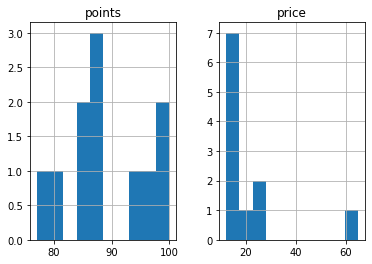

In [17]:
df.hist();

### Skew

In [18]:
df.skew() 

points    0.049885
price     2.766640
dtype: float64

### Q. Which variety of wine has the highest price?

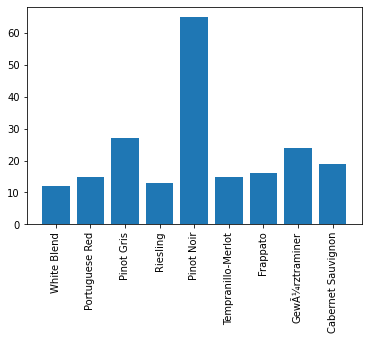

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(df['variety'], df['price'])
plt.xticks(rotation=90)
plt.show()

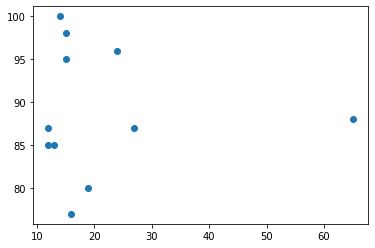

In [20]:
plt.scatter(df['price'], df['points'])
plt.show()

In [21]:
import numpy as np
wine = df['points'].groupby(df['country'])
wine_mean = wine.agg(np.mean)
wine.groups

{'France': Int64Index([7, 9], dtype='int64'),
 'Germany': Int64Index([8], dtype='int64'),
 'Italy': Int64Index([0, 6], dtype='int64'),
 'Portugal': Int64Index([1], dtype='int64'),
 'Spain': Int64Index([5], dtype='int64'),
 'US': Int64Index([2, 3, 4, 10], dtype='int64')}

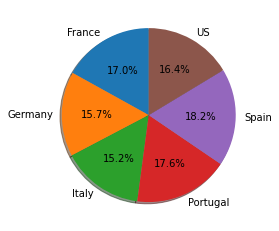

In [22]:
fig1, ax1 = plt.subplots()
ax1.pie(wine_mean,labels=wine.groups,autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()